In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Initial and Reflow validity
N17_ini = np.load('N17_initial.npy')
N17_ref = np.load('N17_reflow.npy')
print('Initial:', np.sum(N17_ini>0), 'Reflow:', np.sum(N17_ref>0))

Initial: 320 Reflow: 399


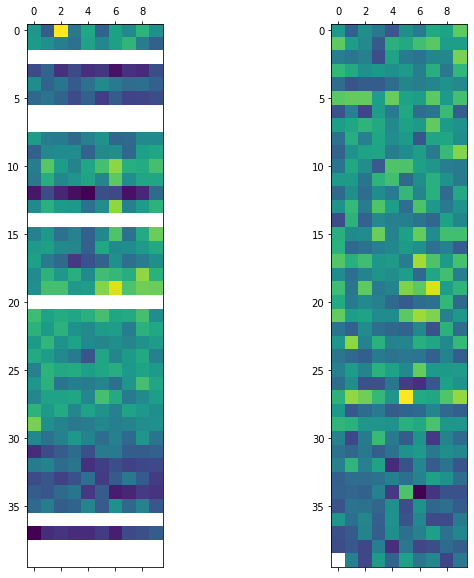

In [3]:
fig, ax = plt.subplots(1, 2)
ax[0].matshow(N17_ini)
ax[1].matshow(N17_ref)
fig.set_figheight(10)
fig.set_figwidth(10)
plt.show()
plt.close()

(320, 1, 64, 64, 64) (399, 1, 64, 64, 64)


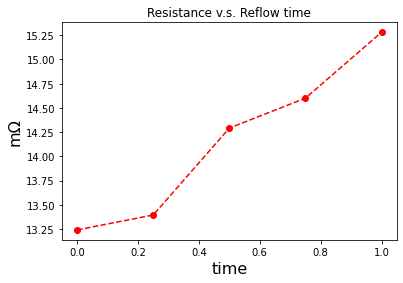

In [4]:
N17_ini_fig = np.load('N17_ini_raw.npy')
N17_ref_fig = np.load('N17_ref_raw.npy')
t05, t25, t75 = np.load('t05.npy'), np.load('t25.npy'), np.load('t75.npy')
print(N17_ini_fig.shape, N17_ref_fig.shape)
one_to_one_bump = np.zeros((320, 2, 64, 64, 64))
ini_to_ref = np.zeros((320, 2))
count = 0
for i in range(400):
    if N17_ini[i//10, i%10]>0 and N17_ref[i//10, i%10]>0:
        ini_to_ref[count, 0] = N17_ini[i//10, i%10]
        ini_to_ref[count, 1] = N17_ref[i//10, i%10]
#         one_to_one_bump[count, 0, :, :, :] = N17_ini_fig[count, 0, :, :, :]
#         one_to_one_bump[count, 1, :, :, :] = N17_ref_fig[i, 0, :, :, :]
        count+=1
plt.plot([0, 0.25, 0.5, 0.75, 1], [np.mean(ini_to_ref[:, 0])*1000, np.mean(t25), np.mean(t05), np.mean(t75), np.mean(ini_to_ref[:, 1]*1000)], 'ro--')
plt.ylabel('mΩ', fontsize=16)
plt.xlabel('time', fontsize=16)
plt.title('Resistance v.s. Reflow time', fontsize=18)
plt.show()
plt.close()
# plt.imshow(one_to_one_bump[0, 1, :, :, 32])
# np.save('N17_ini_to_ref.npy', ini_to_ref)
# np.save('N17_one_to_one.npy', one_to_one_bump)
        